# 7. Evaluation and results comparison

Evaluating stored metrics for different experiments


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from IPython.display import Image

from matplotlib import pyplot as plt
from matplotlib import patches

from metrics import save_metrics
from metrics import plot_metrics
from metrics import init_metrics_file

from models import evaluate_model


from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


sns.set()

---

In [4]:
#init_metrics_file()

In [3]:
plot_metrics()

1_unbalanced 2_weighted 3_balanced 4_with_distance  \
Classifier Metric                                                         
LogReg     accuracy             -          -          -               -   
           f1-score             -          -          -               -   
           auc-roc              -          -          -               -   
           precision            -          -          -               -   
           recall               -          -          -               -   
LGBM       accuracy             -          -          -               -   
           f1-score             -          -          -               -   
           auc-roc              -          -          -               -   
           precision            -          -          -               -   
           recall               -          -          -               -   
KNC        accuracy             -          -          -               -   
           f1-score             -          -          -               -   
           auc-roc              -          -          -               -   
           precision            -          -          -               -   
           recall               -          -          -               -   

                     5_with_angle 6_with_player_ids 7_with_player_stats  \
Classifier Metric                                                         
LogReg     accuracy             -                 -                   -   
           f1-score             -                 -                   -   
           auc-roc              -                 -                   -   
           precision            -                 -                   -   
           recall               -                 -                   -   
LGBM       accuracy             -                 -                   -   
           f1-score             -                 -                   -   
           auc-roc              -                 -                   -   
           precision            -                 -                   -   
           recall               -                 -                   -   
KNC        accuracy             -                 -                   -   
           f1-score             -                 -                   -   
           auc-roc              -                 -                   -   
           precision            -                 -                   -   
           recall               -                 -                   -   

                     8_with_player_salary 9_short_dist 10_long_dist 11_tuned  
Classifier Metric                                                             
LogReg     accuracy                     -            -            -        -  
           f1-score                     -            -            -        -  
           auc-roc                      -            -            -        -  
           precision                    -            -            -        -  
           recall                       -            -            -        -  
LGBM       accuracy                     -            -            -        -  
           f1-score                     -            -            -        -  
           auc-roc                      -            -            -        -  
           precision                    -            -            -        -  
           recall                       -            -            -        -  
KNC        accuracy                     -            -            -        -  
           f1-score                     -            -            -        -  
           auc-roc                      -            -            -        -  
           precision                    -            -            -        -  
           recall                       -            -            -        -

In [38]:
df = plot_metrics()
df['2_weighted'] = df['2_weighted'].replace(to_replace='-', value=0).astype(float)
cols = ['1_unbalanced', '3_balanced', '4_with_distance', '5_with_angle', '6_with_player_ids', '7_with_player_stats', '8_with_player_salary', '9_short_dist']
df = df[cols]
df

1_unbalanced  3_balanced  4_with_distance  5_with_angle  \
Classifier Metric                                                               
LogReg     accuracy       0.906038    0.636113         0.653122      0.651127   
           f1-score       0.000000    0.659962         0.742998      0.753550   
           auc-roc        0.500000    0.636401         0.610147      0.585178   
           precision      0.000000    0.617227         0.659331      0.670114   
           recall         0.000000    0.709055         0.850986      0.860719   
LGBM       accuracy       0.906139    0.682698         0.660047      0.653524   
           f1-score       0.005397    0.692446         0.741281      0.754125   
           auc-roc        0.501270    0.682834         0.623886      0.589357   
           precision      0.622807    0.669317         0.671963      0.673021   
           recall         0.002710    0.717230         0.826544      0.857456   
KNC        accuracy       0.906070    0.671802         0.650210      0.637319   
           f1-score       0.002969    0.675953         0.730539      0.739653   
           auc-roc        0.500685    0.671864         0.616650      0.576252   
           precision      0.565217    0.664946         0.668875      0.666144   
           recall         0.001489    0.687330         0.804728      0.831399   

                      6_with_player_ids  7_with_player_stats  \
Classifier Metric                                              
LogReg     accuracy            0.616843             0.616843   
           f1-score            0.763021             0.763021   
           auc-roc             0.500000             0.500000   
           precision           0.616843             0.616843   
           recall              1.000000             1.000000   
LGBM       accuracy            0.655949             0.661843   
           f1-score            0.757428             0.761459   
           auc-roc             0.590430             0.596848   
           precision           0.670175             0.674013   
           recall              0.870802             0.874979   
KNC        accuracy            0.612854             0.612431   
           f1-score            0.757693             0.755385   
           auc-roc             0.500501             0.503351   
           precision           0.617084             0.618480   
           recall              0.981290             0.970132   

                      8_with_player_salary  9_short_dist  
Classifier Metric                                         
LogReg     accuracy               0.608751      0.679610  
           f1-score               0.756799      0.809247  
           auc-roc                0.500000      0.500000  
           precision              0.608751      0.679610  
           recall                 1.000000      1.000000  
LGBM       accuracy               0.655044      0.694640  
           f1-score               0.752547      0.809430  
           auc-roc                0.597614      0.549124  
           precision              0.667963      0.702793  
           recall                 0.861658      0.954215  
KNC        accuracy               0.605815      0.679346  
           f1-score               0.748143      0.808985  
           auc-roc                0.506881      0.500078  
           precision              0.612178      0.679644  
           recall                 0.961749      0.999127

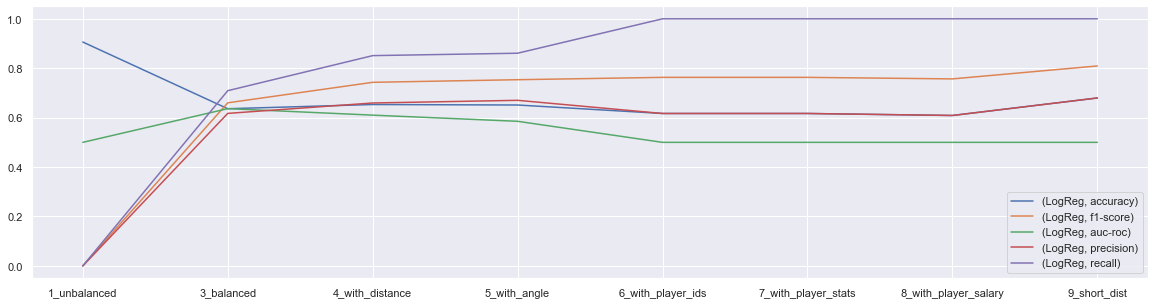

In [42]:
plt.figure(figsize=(20,5))
x = range(0, df.shape[1])
labels = df.columns
plt.xticks(x, labels, rotation='vertical');
df.loc[('LogReg', 'accuracy')].plot();
df.loc[('LogReg', 'f1-score')].plot();
df.loc[('LogReg', 'auc-roc')].plot();
df.loc[('LogReg', 'precision')].plot();
df.loc[('LogReg', 'recall')].plot();
plt.legend()

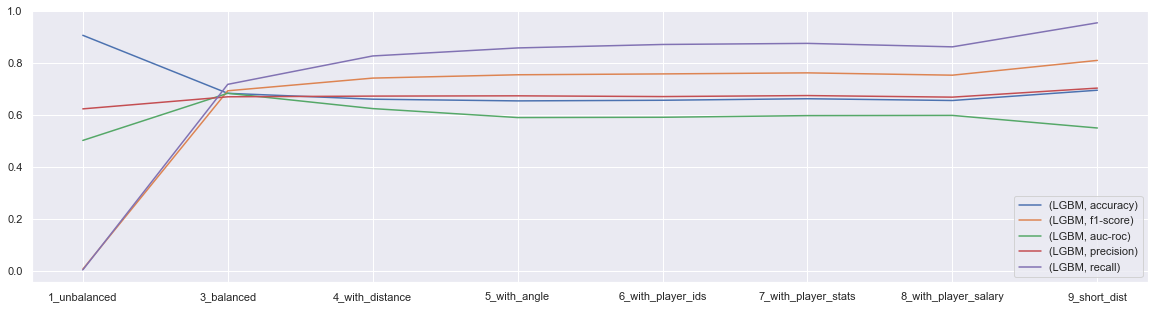

In [43]:
plt.figure(figsize=(20,5))
x = range(0, df.shape[1])
labels = df.columns
plt.xticks(x, labels, rotation='vertical');
df.loc[('LGBM', 'accuracy')].plot();
df.loc[('LGBM', 'f1-score')].plot();
df.loc[('LGBM', 'auc-roc')].plot();
df.loc[('LGBM', 'precision')].plot();
df.loc[('LGBM', 'recall')].plot();
plt.legend()

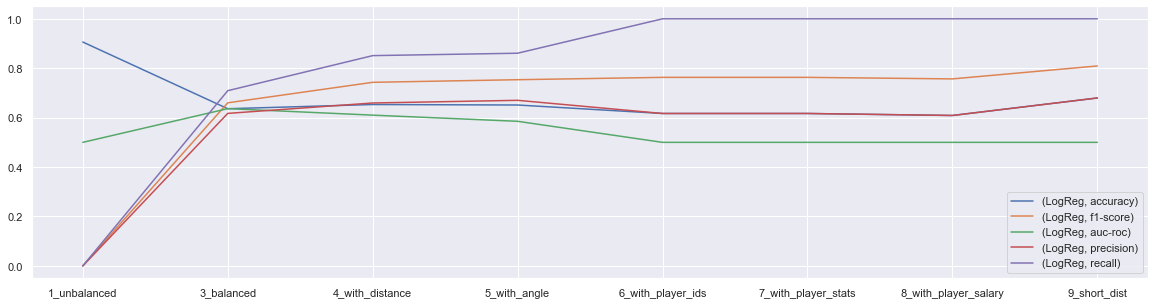

In [44]:
plt.figure(figsize=(20,5))
x = range(0, df.shape[1])
labels = df.columns
plt.xticks(x, labels, rotation='vertical');
df.loc[('LogReg', 'accuracy')].plot();
df.loc[('LogReg', 'f1-score')].plot();
df.loc[('LogReg', 'auc-roc')].plot();
df.loc[('LogReg', 'precision')].plot();
df.loc[('LogReg', 'recall')].plot();
plt.legend();

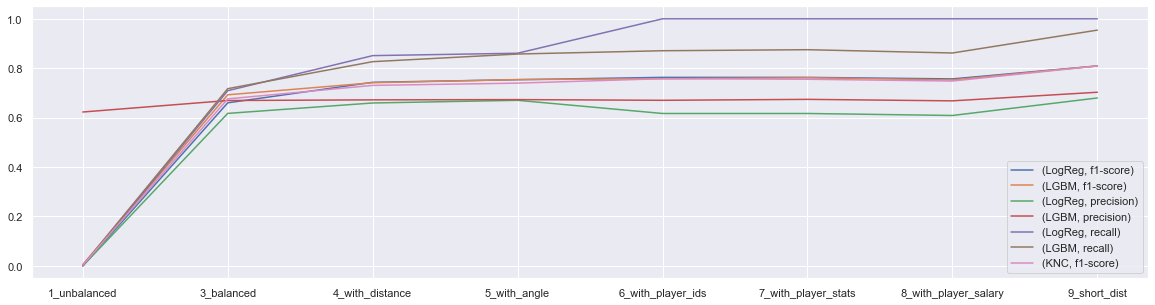

In [45]:
plt.figure(figsize=(20,5))
x = range(0, df.shape[1])
labels = df.columns
plt.xticks(x, labels, rotation='vertical');
df.loc[('LogReg', 'f1-score')].plot();
df.loc[('LGBM', 'f1-score')].plot();
df.loc[('LogReg', 'precision')].plot();
df.loc[('LGBM', 'precision')].plot();
df.loc[('LogReg', 'recall')].plot();
df.loc[('LGBM', 'recall')].plot();
df.loc[('KNC', 'f1-score')].plot();
plt.legend();